# Setup

Requires Python 3.10 and Poetry 1.6. Run setup commands to begin:
```
!poetry install
!poetry run jupyter lab
```

Load libraries and set parameters

In [1]:
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = None

Load raw data

In [2]:
data_path = "data"
raw_data = {
    "A": {
        "test_est": pd.read_parquet(os.path.join(data_path, "A", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "A", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "A", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "A", "train_targets.parquet")),
    },
    "B": {
        "test_est": pd.read_parquet(os.path.join(data_path, "B", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "B", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "B", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "B", "train_targets.parquet")),
    },
    "C": {
        "test_est": pd.read_parquet(os.path.join(data_path, "C", "X_test_estimated.parquet")),
        "train_est": pd.read_parquet(os.path.join(data_path, "C", "X_train_estimated.parquet")),
        "train_obs": pd.read_parquet(os.path.join(data_path, "C", "X_train_observed.parquet")),
        "train_tar": pd.read_parquet(os.path.join(data_path, "C", "train_targets.parquet")),
    },
}

View data

In [5]:
raw_data["C"]["test_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519000,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0
1,2023-04-30 07:00:04,2023-05-01 00:15:00,4.2,1.286,NaN,0.0,0.0,1217.000000,0.0,271.100006,0.0,0.0,0.0,0.0,70.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,998.099976,1004.299988,0.0,0.0,81.000000,1010.599976,NaN,0.0,0.0,0.0,0.0,14.202000,-10.862,0.0,273.700012,70.800003,31295.800781,3.4,1.5,3.1,-0.0
2,2023-04-30 07:00:04,2023-05-01 00:30:00,4.1,1.286,NaN,0.0,0.0,1256.000000,0.0,271.000000,0.0,0.0,0.0,0.0,67.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,998.000000,1004.200012,0.0,0.0,80.900002,1010.500000,NaN,0.0,0.0,0.0,0.0,17.868000,-10.397,0.0,273.700012,67.900002,31178.599609,3.4,1.4,3.1,-0.0
3,2023-04-30 07:00:04,2023-05-01 00:45:00,4.1,1.286,NaN,0.0,0.0,1295.000000,0.0,270.899994,0.0,0.0,0.0,0.0,64.800003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.599976,0.0,0.0,997.799988,1004.099976,0.0,0.0,80.800003,1010.400024,NaN,0.0,0.0,0.0,0.0,21.513000,-9.830,0.0,273.700012,64.800003,31082.500000,3.4,1.4,3.1,-0.0
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.1,1.286,NaN,0.0,0.0,1334.099976,0.0,270.899994,0.0,0.0,0.0,0.0,61.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.400024,0.0,0.0,997.700012,1004.000000,0.0,0.0,80.599998,1010.299988,NaN,0.0,0.0,0.0,0.0,25.134001,-9.163,0.0,273.700012,61.599998,31051.400391,3.4,1.4,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-07-02 07:00:31,2023-07-03 22:45:00,9.0,1.207,2003.500000,0.0,0.0,1573.000000,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,978.799988,984.700012,0.0,0.0,84.000000,990.599976,NaN,0.0,0.0,-0.0,0.0,351.852997,-3.320,0.1,285.299988,100.000000,39008.300781,1.8,1.6,-0.7,0.0
2876,2023-07-02 07:00:31,2023-07-03 23:00:00,9.0,1.207,2005.599976,0.0,0.0,1471.000000,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.799988,984.700012,0.0,0.0,84.099998,990.700012,NaN,0.0,0.0,-0.0,0.0,355.315002,-3.508,0.1,285.200012,100.000000,39026.000000,1.7,1.6,-0.7,0.0
2877,2023-07-02 07:00:31,2023-07-03 23:15:00,9.0,1.207,2005.500000,0.0,0.0,1346.900024,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.500000,0.0,0.0,978.900024,984.799988,0.0,0.0,84.400002,990.700012,NaN,0.0,0.0,-0.0,0.0,358.782013,-3.594,0.1,285.100006,100.000000,39081.300781,1.7,1.6,-0.6,0.0
2878,2023-07-02 07:00:31,2023-07-03 23:30:00,8.9,1.207,2005.500000,0.0,0.0,1222.800049,0.0,282.500000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,979.000000,984.900024,0.0,0.0,84.800003,990.799988,NaN,0.0,0.0,-0.0,0.0,2.250000,-3.579,0.2,285.100006,100.000000,39145.101562,1.7,1.6,-0.6,0.0


In [4]:
raw_data["C"]["train_est"]

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.000000,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.000000,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.000000,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.000000,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.000000,6865.000000,1.2,0.1,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.4,1.280,1034.599976,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.800003,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.599976,1004.900024,0.0,0.0,80.000000,1011.099976,NaN,0.0,0.0,-0.0,0.1,352.915985,-11.769000,0.2,274.200012,99.900002,10681.200195,3.0,2.1,2.2,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.4,1.280,897.200012,0.0,0.0,569.500000,0.0,272.000000,0.0,0.0,0.0,0.0,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,998.500000,1004.799988,0.0,0.0,80.400002,1011.099976,NaN,0.0,0.0,-0.0,0.1,356.630005,-11.923000,0.2,274.100006,100.000000,9890.900391,2.8,1.9,2.1,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.4,1.280,1288.699951,0.0,0.0,562.299988,0.0,272.000000,0.0,0.0,0.0,0.0,99.699997,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,998.400024,1004.700012,0.0,0.0,80.099998,1010.900024,NaN,0.0,0.0,-0.0,0.1,0.349000,-11.967000,0.1,274.200012,100.000000,10716.799805,2.9,1.9,2.2,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.4,1.280,1680.300049,0.0,0.0,555.099976,0.0,271.899994,0.0,0.0,0.0,0.0,99.000000,24.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,998.299988,1004.500000,0.0,0.0,79.800003,1010.799988,NaN,0.0,0.0,-0.0,0.1,4.067000,-11.902000,0.1,274.200012,99.800003,11538.799805,3.0,1.9,2.3,-0.0


In [5]:
raw_data["C"]["train_obs"]

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116820,2022-05-01 21:00:00,4.9,1.257,2652.000000,0.0,0.0,1536.500000,0.0,273.600006,0.0,0.0,0.0,0.0,95.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.799988,0.00,0.0,999.299988,1005.400024,0.0,0.0,62.599998,1011.599976,NaN,0.0,0.0,-0.0,0.0,327.303009,-7.367000,0.0,279.299988,100.000000,38312.000000,4.7,3.0,3.6,-0.0
116821,2022-05-01 21:15:00,4.9,1.256,2375.300049,0.0,0.0,1484.500000,0.0,273.600006,0.0,0.0,0.0,0.0,97.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,999.000000,1005.099976,0.0,0.0,62.799999,1011.299988,NaN,0.0,0.0,-0.0,0.0,330.863007,-8.232000,0.1,279.299988,100.000000,38344.199219,4.8,3.2,3.6,-0.0
116822,2022-05-01 21:30:00,4.9,1.256,2098.699951,0.0,0.0,1432.500000,0.0,273.500000,0.0,0.0,0.0,0.0,98.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.00,0.0,998.599976,1004.799988,0.0,0.0,63.000000,1010.900024,NaN,0.0,0.0,-0.0,0.0,334.451996,-9.006000,0.1,279.200012,100.000000,38402.601562,4.9,3.3,3.6,-0.0
116823,2022-05-01 21:45:00,4.8,1.255,1822.000000,0.0,0.0,1380.400024,0.0,273.399994,0.0,0.0,0.0,0.0,99.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.00,0.0,998.299988,1004.400024,0.0,0.0,63.200001,1010.599976,NaN,0.0,0.0,-0.0,0.0,338.067993,-9.683000,0.1,279.200012,100.000000,38478.800781,5.0,3.5,3.6,-0.0


In [6]:
raw_data["C"]["train_tar"]

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN
...,...,...
32150,2023-04-30 19:00:00,50.96
32151,2023-04-30 20:00:00,2.94
32152,2023-04-30 21:00:00,0.00
32153,2023-04-30 22:00:00,-0.00


Preproccess data

In [14]:
# Create empty list of location train data and location test data
location_train_data = []
location_test_data = []

# Copy raw data dictonary and loop through it
raw_data_copy = copy.deepcopy(raw_data)
for k in raw_data_copy:

    # Add a column with the difference between date_forecast and date_calc in seconds and remove date_calc
    raw_data_copy[k]["train_obs"]["forecast_seconds"] = 0
    raw_data_copy[k]["train_est"]["forecast_seconds"] = (raw_data_copy[k]["train_est"]["date_forecast"] - raw_data_copy[k]["train_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data_copy[k]["train_est"]["date_calc"]
    raw_data_copy[k]["test_est"]["forecast_seconds"] = (raw_data_copy[k]["test_est"]["date_forecast"] - raw_data_copy[k]["test_est"]["date_calc"]).apply(lambda x: x.total_seconds())
    del raw_data_copy[k]["test_est"]["date_calc"]

    # Add a column with location
    raw_data_copy[k]["train_obs"]["location"] = k
    raw_data_copy[k]["train_est"]["location"] = k
    raw_data_copy[k]["test_est"]["location"] = k

    # Concat and merge train observed, train estimated and train target to one dataframe and push to location_train_data list
    location_train_data.append(pd.merge(
        pd.concat([
            raw_data_copy[k]["train_obs"].rename(columns={"date_forecast": "time"}),
            raw_data_copy[k]["train_est"].rename(columns={"date_forecast": "time"}),
        ]),
        raw_data_copy[k]["train_tar"],
        on="time"
    ))

    # Push test estimate to location test data list
    location_test_data.append(raw_data_copy[k]["test_est"].rename(columns={"date_forecast": "time"}))

# Concat all the location data and sort by time
train_data = pd.concat(location_train_data).sort_values(by=['time']).dropna(subset=["pv_measurement"])
test_data = pd.concat(location_test_data).sort_values(by=['time'])

# Replace all ':' with '_'
train_data.columns = [col_name.replace(":", "_") for col_name in train_data.columns]
test_data.columns = [col_name.replace(":", "_") for col_name in test_data.columns]

In [8]:
train_data

,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,location,pv_measurement
0,2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,0.0,0.0,0.0,69.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.400024,0.00,0.0,974.500000,980.599976,0.0,0.0,89.199997,986.599976,NaN,0.0,0.0,-0.0,0.0,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0,0.0,B,0.0
1,2019-01-01 01:00:00,5.4,1.241,1157.599976,0.0,0.0,1157.599976,0.0,274.700012,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.299988,0.05,1.0,973.400024,979.500000,0.0,0.0,88.900002,985.599976,NaN,0.0,0.0,-0.0,0.1,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0,0.0,B,0.0
2,2019-01-01 02:00:00,5.5,1.238,1087.599976,0.0,0.0,1087.599976,0.0,275.000000,0.0,0.0,0.0,0.0,96.300003,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,985.900024,0.00,0.0,973.000000,979.000000,0.0,0.0,87.599998,985.099976,NaN,0.0,0.0,-0.0,0.1,51.573002,-41.963001,0.0,278.200012,98.400002,12776.700195,3.8,2.0,3.3,-0.0,0.0,B,0.0
3,2019-01-01 03:00:00,5.3,1.240,1016.400024,0.0,0.0,1016.400024,0.0,274.500000,0.0,0.0,0.0,0.0,97.199997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.099976,0.00,0.0,973.200012,979.200012,0.0,0.0,86.800003,985.299988,NaN,0.0,0.0,-0.0,0.1,67.794998,-36.167000,0.2,277.799988,97.800003,8399.900391,4.3,2.4,3.6,-0.0,0.0,B,0.0
4,2019-01-01 04:00:00,5.5,1.239,1029.000000,0.0,0.0,1029.000000,0.0,275.000000,0.0,0.0,0.0,0.0,97.500000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.500000,0.06,1.0,973.599976,979.599976,0.0,0.0,91.000000,985.700012,NaN,0.0,0.0,-0.0,0.1,82.383003,-29.681999,0.2,277.200012,97.599998,4102.799805,5.9,5.0,3.2,-0.0,0.0,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32821,2023-04-30 22:00:00,4.5,1.279,1534.300049,0.0,0.0,518.900024,0.0,272.299988,0.0,0.0,0.0,0.0,95.400002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.500000,0.00,0.0,1001.200012,1007.500000,0.0,0.0,78.400002,1013.799988,NaN,0.0,0.0,-0.0,0.0,341.851990,-10.630000,0.1,274.399994,97.400002,17022.000000,4.3,3.4,2.6,-0.0,140395.0,B,-0.0
32128,2023-04-30 22:00:00,4.4,1.279,1446.599976,0.0,0.0,540.700012,0.0,271.899994,0.0,0.0,0.0,0.0,96.500000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.599976,0.00,0.0,998.799988,1005.099976,0.0,0.0,78.800003,1011.299988,NaN,0.0,0.0,-0.0,0.0,341.846008,-10.666000,0.1,274.299988,98.699997,13028.400391,3.5,2.6,2.4,-0.0,140395.0,C,-0.0
32822,2023-04-30 23:00:00,4.5,1.281,1055.800049,0.0,0.0,542.099976,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.00,0.0,1001.000000,1007.200012,0.0,0.0,80.000000,1013.500000,NaN,0.0,0.0,-0.0,0.1,356.635010,-11.884000,0.1,274.200012,100.000000,9955.500000,3.7,2.8,2.5,-0.0,143995.0,B,-0.0
34060,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.00,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0,143995.0,A,0.0


In [9]:
test_data

,time,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,location
0,2023-05-01 00:00:00,4.4,1.286,912.700012,0.0,0.0,1041.199951,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,61196.0,A
0,2023-05-01 00:00:00,4.3,1.283,912.299988,0.0,0.0,1039.900024,0.0,271.700012,0.0,0.0,0.0,0.0,80.699997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,-0.0,0.0,10.521,-11.184,0.0,273.799988,80.699997,31329.500000,4.0,2.2,3.4,-0.0,61196.0,B
0,2023-05-01 00:00:00,4.2,1.286,NaN,0.0,0.0,1178.000000,0.0,271.100006,0.0,0.0,0.0,0.0,73.699997,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,998.200012,1004.500000,0.0,0.0,81.099998,1010.799988,NaN,0.0,0.0,0.0,0.0,10.519,-11.223,0.0,273.700012,73.699997,31411.000000,3.5,1.5,3.1,-0.0,61196.0,C
1,2023-05-01 00:15:00,4.3,1.287,912.700012,0.0,0.0,1054.800049,0.0,271.700012,0.0,0.0,0.0,0.0,77.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.700012,0.0,0.0,1000.599976,1006.900024,0.0,0.0,80.300003,1013.200012,NaN,0.0,0.0,0.0,0.0,14.203,-10.825,0.0,273.799988,77.000000,30003.599609,4.0,2.1,3.4,-0.0,62096.0,A
1,2023-05-01 00:15:00,4.3,1.283,912.299988,0.0,0.0,1053.099976,0.0,271.700012,0.0,0.0,0.0,0.0,77.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.799988,0.0,0.0,1000.500000,1006.700012,0.0,0.0,80.300003,1013.000000,NaN,0.0,0.0,-0.0,0.0,14.204,-10.824,0.0,273.799988,77.099998,31181.599609,4.0,2.1,3.4,-0.0,62096.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,2023-07-03 23:30:00,9.0,1.208,2015.599976,0.0,0.0,1405.500000,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,981.000000,986.900024,0.0,0.0,83.199997,992.900024,NaN,0.0,0.0,-0.0,0.0,2.253,-3.541,0.1,285.200012,100.000000,39691.800781,2.0,1.6,-1.1,0.0,145769.0,A
2878,2023-07-03 23:30:00,9.0,1.207,2015.000000,0.0,0.0,1408.599976,0.0,282.700012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.599976,0.0,0.0,980.900024,986.799988,0.0,0.0,83.099998,992.700012,NaN,0.0,0.0,-0.0,0.0,2.253,-3.540,0.1,285.200012,100.000000,40138.101562,2.0,1.6,-1.1,0.0,145769.0,B
2879,2023-07-03 23:45:00,9.0,1.207,2014.900024,0.0,0.0,1343.599976,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.700012,0.0,0.0,981.000000,986.900024,0.0,0.0,83.500000,992.799988,NaN,0.0,0.0,-0.0,0.0,5.719,-3.423,0.2,285.200012,100.000000,40204.500000,1.9,1.6,-1.1,0.0,146669.0,B
2879,2023-07-03 23:45:00,9.0,1.208,2015.599976,0.0,0.0,1339.599976,0.0,282.600006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.700012,0.0,0.0,981.099976,987.000000,0.0,0.0,83.500000,992.900024,NaN,0.0,0.0,-0.0,0.0,5.718,-3.424,0.2,285.200012,100.000000,39768.800781,1.9,1.6,-1.1,0.0,146669.0,A


Analyse train data

In [10]:
train_data.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_seconds,pv_measurement
count,92951.000000,92951.000000,72276.000000,9.295100e+04,92951.000000,84404.000000,92951.000000,92951.000000,92951.000000,9.295100e+04,92951.000000,9.295100e+04,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,4176.0,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000
mean,6.017608,1.255435,2802.587646,5.151541e+05,143.101379,1692.934692,0.007025,275.237793,39.495815,1.421800e+05,50.205021,1.807402e+05,67.013519,11.401738,0.116175,0.009630,0.229894,0.029001,0.058069,0.483341,0.565384,1009.502563,0.005674,0.083259,995.819031,1001.949768,0.756834,0.009677,73.669563,1008.107727,250.0,0.193203,0.000022,0.000275,0.090324,182.386337,-1.207574,0.056944,279.431061,73.604263,33027.937500,3.037911,0.662565,0.682400,-0.000016,11737.447064,287.232321
std,2.714546,0.036608,2521.408447,8.205255e+05,228.507324,1790.963745,0.246032,6.834610,60.647518,2.159072e+05,112.946068,4.017350e+05,35.044811,7.877236,0.780374,0.112621,1.218249,0.280670,0.481389,0.499725,0.495709,13.089046,0.033511,0.384904,13.008334,13.067102,5.434649,0.042968,14.328553,13.128181,0.0,1.254293,0.004639,0.004312,0.250991,102.913605,24.010485,0.111482,6.520342,34.993042,18319.150391,1.778505,2.808995,1.896996,0.006502,33280.014923,766.670114
min,0.500000,1.139000,27.799999,0.000000e+00,0.000000,27.400000,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,19.500000,941.400024,250.0,0.000000,0.000000,-0.000000,0.000000,0.008000,-49.979000,0.000000,257.899994,0.000000,130.600006,0.000000,-7.300000,-9.300000,-0.100000,0.000000,-0.000000
25%,4.000000,1.230000,1037.099976,0.000000e+00,0.000000,572.200012,0.000000,270.700012,0.000000,0.000000e+00,0.000000,0.000000e+00,41.299999,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.400024,0.000000,0.000000,987.799988,993.900024,0.000000,0.000000,64.199997,1000.000000,250.0,0.000000,0.000000,0.000000,0.000000,92.794003,-18.511000,0.000000,274.899994,51.700001,15798.950195,1.700000,-1.400000,-0.600000,0.000000,0.000000,0.000000
50%,5.400000,1.255000,1803.250000,4.544900e+03,0.000000,1128.550049,0.000000,275.000000,0.000000,9.951700e+03,0.000000,0.000000e+00,80.800003,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.299988,0.000000,0.000000,996.799988,1002.900024,0.000000,0.000000,76.000000,1009.000000,250.0,0.000000,0.000000,0.000000,0.000000,179.526001,-0.990000,0.000000,278.700012,94.800003,37350.300781,2.700000,0.300000,0.700000,0.000000,0.000000,0.000000
75%,7.800000,1.279000,3814.824951,7.782472e+05,220.949997,2016.699951,0.000000,280.500000,66.000000,2.365028e+05,29.000000,1.133662e+05,99.300003,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,101

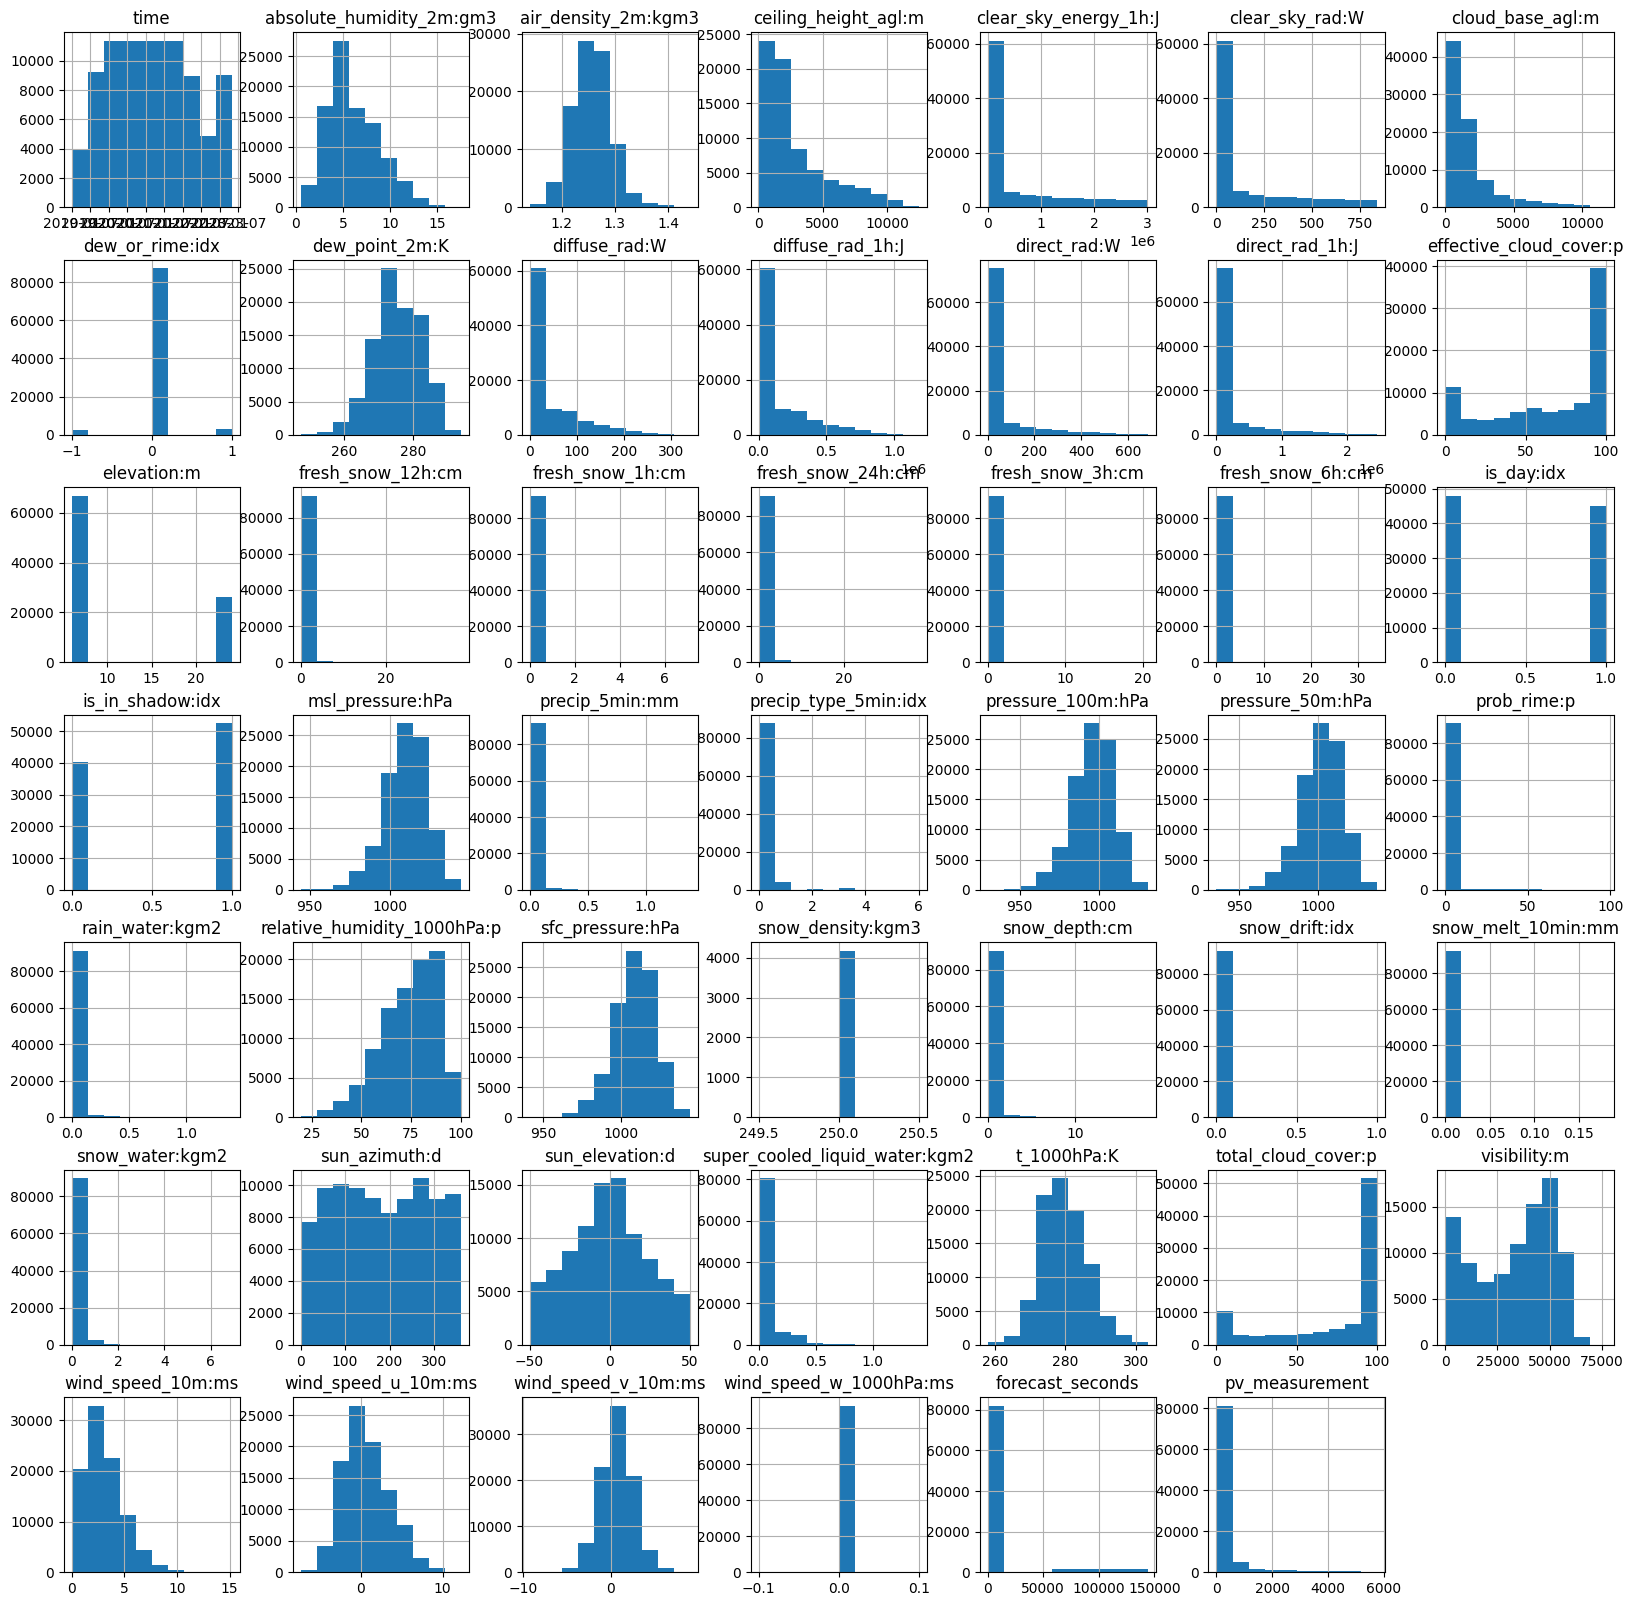

In [11]:
train_data.hist(figsize=(20,20));

1. time
2. absolute_humidity_2m:gm3
3. air_density_2m:kgm3
4. ceiling_height_agl:m
5. clear_sky_energy_1h:J
6. clear_sky_rad:W
7. cloud_base_agl:m
8. dew_or_rime:idx
9. dew_point_2m:K
10. diffuse_rad:W
11. diffuse_rad_1h:J
12. direct_rad:W
13. direct_rad_1h:J
14. effective_cloud_cover:p
15. elevation:m
16. fresh_snow_12h:cm
17. fresh_snow_1h:cm
18. fresh_snow_24h:cm
19. fresh_snow_3h:cm
20. fresh_snow_6h:cm
21. is_day:idx
22. is_in_shadow:idx
23. msl_pressure:hPa
24. precip_5min:mm
25. precip_type_5min:idx
26. pressure_100m:hPa
27. pressure_50m:hPa
28. prob_rime:p
29. rain_water:kgm2
30. relative_humidity_1000hPa:p
31. sfc_pressure:hPa
32. snow_density:kgm3
33. snow_depth:cm
34. snow_drift:idx
35. snow_melt_10min:mm
36. snow_water:kgm2
37. sun_azimuth:d
38. sun_elevation:d
39. super_cooled_liquid_water:kgm2
40. t_1000hPa:K
41. total_cloud_cover:p
42. visibility:m
43. wind_speed_10m:ms
44. wind_speed_u_10m:ms
45. wind_speed_v_10m:ms
46. wind_speed_w_1000hPa:ms
47. forecast_seconds
48. l

C:\Users\falke\AppData\Local\Temp\ipykernel_9892\3528957958.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train_data.corr(), cmap="PRGn", interpolation="none", vmin=-1, vmax=1)


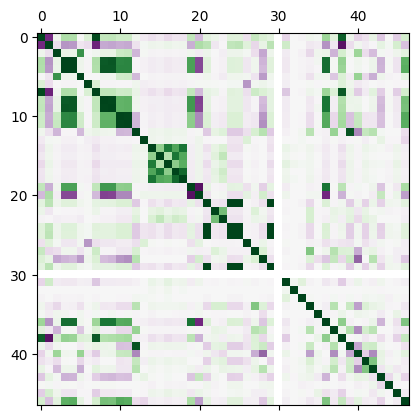

In [12]:
for i, column in enumerate(train_data.columns, 1):
    print(f"{i}. {column}")

plt.matshow(train_data.corr(), cmap="PRGn", interpolation="none", vmin=-1, vmax=1)
plt.show()

# Pycaret regression

Import pycaret

In [13]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

Setup model

In [14]:
exp.setup(train_data, target = 'pv_measurement', index=False)

,Description,Value
0,Session id,8034
1,Target,pv_measurement
2,Target type,Regression
3,Original data shape,"(262865, 49)"
4,Transformed data shape,"(262865, 53)"
5,Transformed train set shape,"(184005, 53)"
6,Transformed test set shape,"(78860, 53)"
7,Numeric features,46
8,Date features,1
9,Categorical features,1


Train and compare different models

In [15]:
exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,337.6706,454734.2414,674.2906,0.1989,3.6497,14.7707,2.2360
catboost,CatBoost Regressor,345.0520,465187.6713,681.9953,0.1805,3.6579,21.8231,45.8270
gbr,Gradient Boosting Regressor,356.2328,469533.1109,685.1720,0.1728,3.9072,15.4705,58.3300
xgboost,Extreme Gradient Boosting,350.6961,483478.3469,695.2770,0.1482,3.6560,16.1596,2.9460
ridge,Ridge Regression,379.6159,527962.5924,726.5337,0.0701,4.0863,16.9025,0.5240
lr,Linear Regression,379.6293,527963.4607,726.5344,0.0701,4.0863,16.9481,1.6270
br,Bayesian Ridge,379.4010,528010.5263,726.5665,0.0700,4.0861,16.8099,1.2730
llar,Lasso Least Angle Regression,377.9620,528691.1234,727.0328,0.0688,4.0836,16.4551,0.7060
lasso,Lasso Regression,377.6407,531510.7323,728.9678,0.0638,4.0810,15.7662,13.3900
en,Elastic Net,377.3948,531856.9563,729.2055,0.0632,4.0797,15.7841,14.6590


LGBMRegressor(n_jobs=-1, random_state=8034)

# Pytorch nerual network

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


class TimeSeriesModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TimeSeriesModel, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, X_estimated, X_observed):
        x = torch.cat((X_estimated, X_observed), dim=2)
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

criterion = nn.MSELoss()

input_size = X_train_estimated.shape[2]
hidden_size = 64
output_size = 1
learning_rate = 0.001

keys = ["A", "B", "C"]

for key in keys:
    data = raw_data[key]

    X_train_est = torch.tensor(data["train_est"].values, dtype=torch.float32)
    X_train_obs = torch.tensor(data["train_obs"].values, dtype=torch.float32)
    y_train = torch.tensor(data["train_tar"].values, dtype=torch.float32)
    X_test_est = torch.tensor(data["test_est"].values, dtype=torch.float32)

    batch_size = 64 
    train_dataset = TensorDataset(X_train_est, X_train_obs, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    
    model = TimeSeriesModel(input_size, hidden_size, output_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.eval()
    predictions = []
    with torch.no_grad():
        for x_est, x_obs, _ in train_loader:
            inputs = torch.cat((x_est, x_obs), dim=2)
            inputs = inputs.view(x_est.size(0), -1, input_size)  # Reshape input for one sequence
            outputs = model(inputs)
            predictions.append(outputs)


NameError: name 'X_train_estimated' is not defined